### Assignment 4 
#### Deep Learning

The training archive contains 25,000 images of dogs and cats. Training CNN on these files and predicting the labels for test data  (1 = dog, 0 = cat)

Importing the required variables

In [1]:
import cv2
import numpy as np
import os
import os
from tqdm import tqdm
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
from random import shuffle

TRAIN = 'C:/Users/rukem/ADS Projects/Assignment 4/train'
TEST = 'C:/Users/rukem/ADS Projects/Assignment 4/test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogvscats-{}-{}.model'.format(LR,'2conv-basic')

### PART A - DEEP LEARNING MODEL 
 * Creating a function to hot encode thw data in the training dataset
 * Creating the function for training data set and pre-processing the data so that it is easier for out model to read the data 
 * Creating the function for test data so that, we can apply CNNm model.

In [2]:
def label_img(img):
    label = img.split('.')[-3]
    if label == 'cat': return[1,0]
    elif label == 'dog' : return[0,1]

In [3]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN)):
        name = label_img(img)
        path = os.path.join(TRAIN,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(name)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [4]:
def testing_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST)):
        path = os.path.join(TEST,img)
        img_no = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_no])
        
    np.save('testing_data.npy', testing_data) 
    return testing_data

Loading our training Data-set

In [5]:
##train_data = create_train_data()
train_data  = np.load('train_data.npy')

Building our first model, with 2 2d_convolution layers having 32 and 64 neurons tespectively and applyig max pool after each layer and one fully connected layer 

In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf
tf.reset_default_graph()


convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


Instructions for updating:
Use the retry module or similar alternatives.
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

Creating a train data and a part of the train data as the test data , to test the effciency of our model

In [8]:
train = train_data[:-500]
test = train_data[-500:]

In [9]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

In [10]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

Fitting our model to the data and using epoch 3 for starters to see how our model performs.

In [11]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)



Training Step: 1148  | total loss: 11.25376 | time: 90.419s
| Adam | epoch: 003 | loss: 11.25376 - acc: 0.5113 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.27968 | time: 91.664s
| Adam | epoch: 003 | loss: 11.27968 - acc: 0.5101 | val_loss: 11.65108 - val_acc: 0.4940 -- iter: 24500/24500
--


From the above training we can see that our model has val_loss : 11.347 and val-acc: 0.50

In [ ]:
#tensorboard --logdir=fooC:\Users\rukem\ADS Projects\log

In [24]:
import matplotlib.pyplot as plt

Lets see how our model classifies the images.

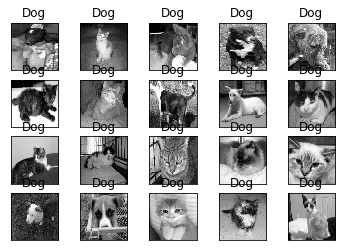

In [27]:
##test_data = testing_data()
test_data = np.load('testing_data.npy')

fig=plt.figure()
for num,data in enumerate(test_data[:20]):
    #cat:[1:0]
    #dog:[0:1]
    
    img_num=data[1]
    img_data=data[0]
    
    y= fig.add_subplot(4,5,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out=model.predict([data])[0]
    
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

We can see that it is not able to classify it correctly. So we will make some tweeks and see whether we can improve our performance

PART F - NETWORK ARCHITECTURE 
 * First order of work, we do some changes in the network architecture, like I have adde some more layers to the model and the the size of the layers

In [68]:
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model1 = tflearn.DNN(convnet, tensorboard_dir='log')

In [69]:
model1.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.60251 | time: 127.483s
| Adam | epoch: 003 | loss: 0.60251 - acc: 0.6633 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.58809 | time: 128.794s
| Adam | epoch: 003 | loss: 0.58809 - acc: 0.6782 | val_loss: 0.66266 - val_acc: 0.6620 -- iter: 24500/24500
--


* What wee see from the above training is that this model is a bit more efficient and gives us a val_loss: 0.66 and vl_acc: 0.66 
  which is better than ur prevouis model.
* We can also see that our model is able to classify in a better way.

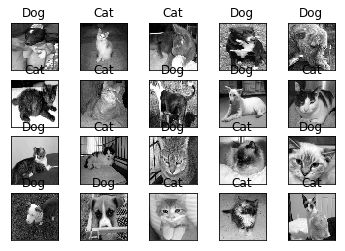

In [70]:
fig=plt.figure()
for num,data in enumerate(test_data[:20]):
    #cat:[1:0]
    #dog:[0:1]
    
    img_num=data[1]
    img_data=data[0]
    
    y= fig.add_subplot(4,5,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out=model1.predict([data])[0]
    
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

PART B AND C  - ACTIVATION FUNCTIONACTIVATION FUNCTION and EPOCHS 

* So i tried changing the activation function and epochs 
  * Relu - LeakyRelu
  * epochs from 3 to 5

In [72]:
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='LeakyReLU')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model2 = tflearn.DNN(convnet, tensorboard_dir='log')

In [73]:
model2.fit({'input': X}, {'targets': Y}, n_epoch=8, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3063  | total loss: 0.36666 | time: 112.830s
| Adam | epoch: 008 | loss: 0.36666 - acc: 0.8435 -- iter: 24448/24500
Training Step: 3064  | total loss: 0.37845 | time: 114.125s
| Adam | epoch: 008 | loss: 0.37845 - acc: 0.8341 | val_loss: 0.52169 - val_acc: 0.7860 -- iter: 24500/24500
--


We can see that the val_loss: 0.50 has becomess less and the val_acc : 0.78 has increased
Below we can see even better predictions

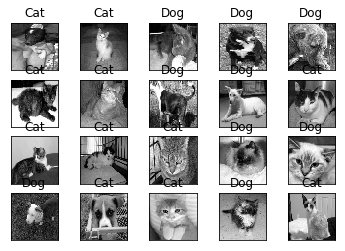

In [74]:
fig=plt.figure()
for num,data in enumerate(test_data[:20]):
    #cat:[1:0]
    #dog:[0:1]
    
    img_num=data[1]
    img_data=data[0]
    
    y= fig.add_subplot(4,5,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out=model2.predict([data])[0]
    
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

 PART C AND D - COST FUNCTION and GRADIENT ESTIMATION
 * Chnages the Cost Function and Grdient Estimation
    * categorical_crossentropy - hinge_loss
    * adam - sgd

In [57]:
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='LeakyReLU')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='sgd', learning_rate=LR, loss='hinge_loss', name='targets')

model3 = tflearn.DNN(convnet, tensorboard_dir='log')

In [59]:
model3.fit({'input': X}, {'targets': Y}, n_epoch=8, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3160  | total loss: 0.74214 | time: 100.649s
| SGD | epoch: 009 | loss: 0.74214 - acc: 0.5237 -- iter: 24448/24500
Training Step: 3161  | total loss: 0.74300 | time: 101.911s
| SGD | epoch: 009 | loss: 0.74300 - acc: 0.5182 | val_loss: 0.74458 - val_acc: 0.5140 -- iter: 24500/24500
--


The val_loss : 0.744 increased and val_acc : 0.51 decreased
 
Result bad predictions

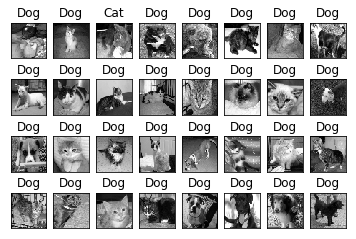

In [60]:
fig=plt.figure()
for num,data in enumerate(test_data[:32]):
    #cat:[1:0]
    #dog:[0:1]
    
    img_num=data[1]
    img_data=data[0]
    
    y= fig.add_subplot(4,8,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out=model3.predict([data])[0]
    
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [63]:
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='LeakyReLU')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='LeakyReLU')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='mean_square', name='targets')

model4 = tflearn.DNN(convnet, tensorboard_dir='log')

In [64]:
model4.fit({'input': X}, {'targets': Y}, n_epoch=8, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3063  | total loss: 0.12438 | time: 118.332s
| Adam | epoch: 008 | loss: 0.12438 - acc: 0.8150 -- iter: 24448/24500
Training Step: 3064  | total loss: 0.12439 | time: 119.645s
| Adam | epoch: 008 | loss: 0.12439 - acc: 0.8116 | val_loss: 0.14947 - val_acc: 0.7740 -- iter: 24500/24500
--


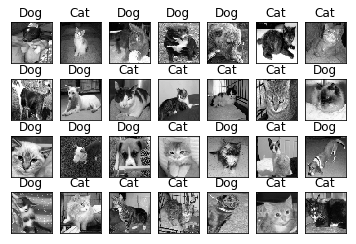

In [67]:
fig=plt.figure()
for num,data in enumerate(test_data[:28]):
    #cat:[1:0]
    #dog:[0:1]
    
    img_num=data[1]
    img_data=data[0]
    
    y= fig.add_subplot(4,7,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out=model4.predict([data])[0]
    
    if np.argmax(model_out)==1: str_label='Dog'
    else: str_label='Cat'
    
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

## Summary 
 * Change the activation function. How does it effect the accuracy?
   * The accuracy improved for my model
 * Change the cost function. How does it effect the accuracy?
   * The accuracy decreased for mu model
 * Change the number of epochs initialization. How does it effect the accuracy?
   * The accuracy improved for my model
 * Change the gradient estimation. How does it effect the accuracy?
   * The accuracy decreased for my model
 * Change the network architecture. How does it effect the accuracy?
   * The accuracy imporved.